### <font color='blue'> ANÁLISE EXPLORATÓRIA E VISUALIZAÇÃO DOS DADOS </font>

In [1]:
from pandas import read_csv, DataFrame
# ---------------------------------
import warnings; warnings.filterwarnings('ignore')

dcommon = read_csv('./datasetCommon.csv', sep=';')
dfull = read_csv('./datasetFull.csv', sep=';')
ddummy = read_csv('./datasetDummy.csv', sep=';')

# print('Shape Common:', dcommon.shape)
# print('Shape Full  :', dfull.shape)
# print('Shape Dummy :', ddummy.shape)

In [2]:
# dclean = dcommon.copy()
dclean = dfull.copy()
# dclean = ddummy.copy()

# Remover quem nao fez nenhuma avaliação
dclean = dclean.drop( dclean[(dclean.AV1 == 0) & (dclean.AV2 == 0) & (dclean.AV3 == 0) ].index)
dclean.index = range(dclean.shape[0])  ## Restaurar Index
# ---------------------------------
df = dclean[262:]
df.index = range(df.shape[0])  ## Restaurar Index
# ---------------------------------
df_target = dfull[:262]
df_target.index = range(df_target.shape[0])  ## Restaurar Index

In [3]:
dfull.shape, dclean.shape, df.shape, df_target.shape

((2897, 13), (2521, 13), (2259, 13), (262, 13))

In [4]:
def av3(data, print_data = False):
    avs = ['AV1','AV2','AV3']
    if(print_data):
        print('\033[0m GERAL\n---------------------------------')
    for av in avs:
        if (av == 'AV3'):
            string = '\033[1m Fizeram a {}: {} de {} ({}%)'
        else:
            string = '\033[0m Fizeram a {}: {} de {} ({}%)'
        if(print_data):
            print( string.format(
                    av,
                    data[(data[av] > 0)].shape[0],
                    data.shape[0],
                    round( ( data[(data[av] > 0)].shape[0] / data.shape[0] *100), 2 )))


def av3Por(data, av3por = ['CURSO'], avs = ['AV1','AV2','AV3'], print_data = False):
    for ap in range(len(av3por)):
        av3p = av3por[ap].lower() # turma
        av3ps = av3p+'s'          # turmas
        av3ps = [ ii for ii in data[av3por[ap].lower().capitalize()].drop_duplicates() ]
        if(print_data):
            print('\n')
            print('\033[0m POR %s\n---------------------------------' % (av3por[ap].upper()))
        
        for av in avs:
            if (av == 'AV3'):
                string = '\033[1m {} Fizeram a {}: {} de {} ({}%)'
                list_av3p = []
                list_total = []
                list_percent = []
            else:
                string = '\033[0m {} Fizeram a {}: {} de {} ({}%)'

            for av3p in av3ps:
                # --------------------------------- 
                presence = data[(data[av3por[ap].lower().capitalize()] == av3p) & (data[av] > 0)].shape[0] # Presente na AV
                total    = data[(data[av3por[ap].lower().capitalize()] == av3p)].shape[0] # Total da Turma
                percent  = round( (data[(data[av3por[ap].lower().capitalize()] == av3p) & (data[av] > 0)].shape[0] / 
                    data[(data[av3por[ap].lower().capitalize()] == av3p)].shape[0] *100), 2 )    # Percentual
                # ---------------------------------
                if (av == 'AV3'):
                    list_av3p.append(av3p)
                    list_total.append(total)
                    list_percent.append(percent)
                # ---------------------------------
                if(print_data):
                    print( string.format(
                        av3p,     # Escolha por: Turma, Disciplina, etc
                        av,       # AV's
                        presence, # Presente na AV
                        total,    # Total da Turma
                        percent   # Percentual
                    ) )
            
            if(print_data):
                print('')
            
        if av3por[ap] == 'TURMA':
            dd = {av3por[ap]:list_av3p,
                             'TOTAL':list_total,
                             av:list_percent}
            
    return DataFrame(dd).sort_values('TOTAL')

In [5]:
## Separar turmas que não houve presença na AV3
turmas = [ ii for ii in df.Turma.drop_duplicates() ]
av3_presente = [ df[ (df.Turma == turma) & (df.AV3Bin > 0) ].shape[0] for turma in turmas ]
turma_zero = []

for ii in range(len(turmas)):
    if av3_presente[ii] == 0:
        turma_zero.append(turmas[ii])

## Excluir as turmas
for tt in turma_zero:
    df = df.drop( df[ df.Turma == tt ].index )

In [6]:
av3(df, print_data=False)
# --------------------------------- 
# _ = av3Por(df, av3por=['CURSO', 'PERIODO', 'TURMA', 'TURNO', 'DISCIPLINA', 'MATRICULA'], print_data=True)
# _ = av3Por(df, av3por=['TURMA'], print_data=True)
dd = av3Por(df, av3por=['TURMA','PERIODO','DISCIPLINA','CURSO'], print_data=False)

In [7]:
import matplotlib.pyplot as plt
from numpy import array
# --------------------------------- 
# print(plt.style.available)
plt.style.use('seaborn')
# plt.style.use('default')


def plotAV3Por(data, av3por = ['TURMA'], absolute = False):
    
    nrowsSegments = 1
    ncolsSegments = len(av3por)
    colorFontTitle = 'black'
    colorFontLabel = 'black'
    fontsize_title = 14
    fontsize_label = 14
    ticklabels_fontsize = 12
    ticklabels_fontweight = 'bold'
    
    (fig, axes) = plt.subplots(nrowsSegments, ncolsSegments, figsize=(15, 3))

    count_av3 = []
    count_av3_not = []
    count_pp = []
    
    for ap in range(len(av3por)):
        av3p = av3por[ap].lower() # turma
        av3ps = av3p+'s'          # turmas
        av3ps = [ ii for ii in data[av3por[ap].lower().capitalize()].drop_duplicates() ]
        # --------------------------------- 
        av3p = [ av3p for av3p in av3ps ]
        pp = [ str(p) for p in av3p ]

        if absolute:
            label='Abs'
            av3 = [ (data[(data[av3por[ap].lower().capitalize()] == av3p) & (data.AV3Bin > 0)].shape[0]) for av3p in av3ps ]
            av3_not = [ (data[(data[av3por[ap].lower().capitalize()] == av3p)].shape[0] - 
                     data[(data[av3por[ap].lower().capitalize()] == av3p) & (data.AV3Bin > 0)].shape[0]) for av3p in av3ps ]
        else:
            label='(%)'
            av3 = [ (data[(data[av3por[ap].lower().capitalize()] == av3p) & (data.AV3Bin > 0)].shape[0] / 
                     data[(data[av3por[ap].lower().capitalize()] == av3p)].shape[0] *100) for av3p in av3ps ]
            av3_not = [ 100-rest for rest in av3 ]

        if ncolsSegments > 1:
            axes[ap].bar(pp, av3)
            axes[ap].bar(pp, av3_not, color='lightgrey', bottom=av3)
            # --------------------------------- 
            axes[ap].set_xticklabels(pp, rotation=90, fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
            axes[ap].set_yticklabels(array([ int(ii) for ii in axes[ap].get_yticks() ]), 
                                     fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
            # --------------------------------- 
            axes[ap].set_xlabel(av3por[ap].upper(), fontweight='bold', color=colorFontLabel, fontsize=fontsize_label)
            axes[ap].set_ylabel(label, fontweight='bold', color=colorFontLabel, fontsize=fontsize_label)
            # --------------------------------- 
            axes[ap].set_title('AV3', fontweight='bold', color=colorFontTitle, fontsize=fontsize_title)
            axes[ap].legend(('Presente','Ausente'), loc='upper left')
        else:
            axes.bar(pp, av3, color='C0')
            axes.bar(pp, av3_not, color='lightgrey', bottom=av3)
            # --------------------------------- 
            axes.set_xticklabels(pp, rotation=90, fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
            axes.set_yticklabels(array([ int(ii) for ii in axes.get_yticks() ]), 
                                 fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
            # --------------------------------- 
            axes.set_xlabel(av3por[ap].upper(), fontweight='bold', fontsize=fontsize_label)
            axes.set_ylabel(label, fontweight='bold', color=colorFontLabel, fontsize=fontsize_label)
            # --------------------------------- 
            axes.set_title('AV3', fontweight='bold', color=colorFontTitle, fontsize=fontsize_title)
            axes.legend(('Presente','Ausente'), loc='upper left')
            
            count_av3.append(av3)
            count_av3_not.append(av3_not)
            count_pp.append(pp)
            
            # Maior valor
            for i in range(len(count_av3[0])):
                if count_av3[0][i] == max(count_av3[0]):
                    axes.bar(pp, av3)[i].set_color('red')
                    
    return count_av3, count_av3_not, count_pp #plt.show()

In [8]:
# df.AV3Bin.value_counts().plot(kind='bar', figsize=(3,3))

In [9]:
print('Total de TURMAS      : ', len(df.Turma.drop_duplicates()) )
print('Total de Observações : ', df.shape[0])

print('Presente na AV3      : ', df[df.AV3 > 0].shape[0], ' de', df.shape[0], 
      '(', round(df[df.AV3 > 0].shape[0] / df.shape[0] *100, 2), '%)' )
print('Ausentes na AV3      : ', df[df.AV3 == 0].shape[0], 'de', df.shape[0], 
      '(', round(df[df.AV3 == 0].shape[0] / df.shape[0] *100, 2), '%)' )

Total de TURMAS      :  46
Total de Observações :  2239
Presente na AV3      :  893  de 2239 ( 39.88 %)
Ausentes na AV3      :  1346 de 2239 ( 60.12 %)


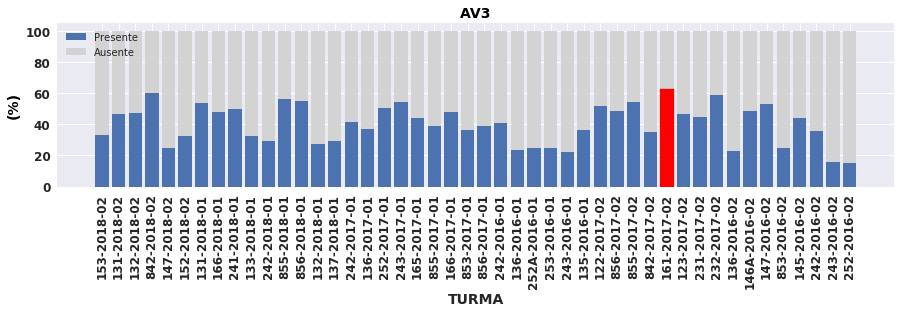

In [10]:
## Valores percentual
cav3, cav3not, pp = plotAV3Por(df, ['TURMA',], absolute=False)

In [11]:
# Dez turmas com maior presença na AV3
presenca = sorted( dict(zip(pp[0], [ round(i,2) for i in cav3[0] ])).items(), key=lambda t:t[1], 
                  reverse=True )[:10]
ausencia = sorted( dict(zip(pp[0], [ round(i,2) for i in cav3not[0] ])).items(), key=lambda t:t[1], 
                  reverse=False )[:10]

In [12]:
presenca

[('161-2017-02', 62.96),
 ('842-2018-02', 60.42),
 ('232-2017-02', 59.26),
 ('855-2018-01', 56.52),
 ('856-2018-01', 55.0),
 ('855-2017-02', 54.55),
 ('243-2017-01', 54.29),
 ('131-2018-01', 53.85),
 ('147-2016-02', 52.94),
 ('122-2017-02', 51.9)]

In [13]:
ausencia

[('161-2017-02', 37.04),
 ('842-2018-02', 39.58),
 ('232-2017-02', 40.74),
 ('855-2018-01', 43.48),
 ('856-2018-01', 45.0),
 ('855-2017-02', 45.45),
 ('243-2017-01', 45.71),
 ('131-2018-01', 46.15),
 ('147-2016-02', 47.06),
 ('122-2017-02', 48.1)]

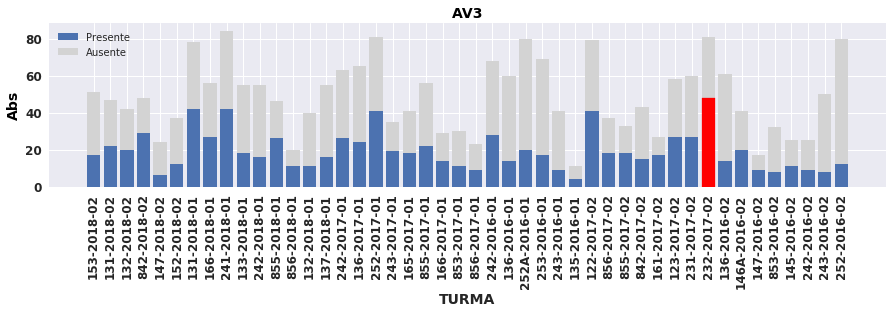

In [14]:
## Valores absolutos
abs_cav3, abs_cav3not, abs_pp = plotAV3Por(df, ['TURMA',], absolute=True)

In [15]:
# Indices das dez turmas em percentual para buscar em valores absolutos

tr = [ presenca[ii][0] for ii in range(len(presenca)) ]
ind = []

for ii in range(len(tr)):
    for jj in range(len(abs_pp[0])):
        if abs_pp[0][jj] == tr[ii]:
            ind.append(jj)
            
ind

[34, 3, 37, 11, 12, 32, 18, 6, 40, 30]

In [16]:
abs_tr = [ abs_pp[0][ii] for ii in ind ]
abs_presenca = [ abs_cav3[0][ii] for ii in ind ]
abs_ausencia = [ abs_cav3not[0][ii] for ii in ind ]

In [17]:
dict(zip(abs_tr, abs_presenca))

{'161-2017-02': 17,
 '842-2018-02': 29,
 '232-2017-02': 48,
 '855-2018-01': 26,
 '856-2018-01': 11,
 '855-2017-02': 18,
 '243-2017-01': 19,
 '131-2018-01': 42,
 '147-2016-02': 9,
 '122-2017-02': 41}

In [18]:
dict(zip(abs_tr, abs_ausencia))

{'161-2017-02': 10,
 '842-2018-02': 19,
 '232-2017-02': 33,
 '855-2018-01': 20,
 '856-2018-01': 9,
 '855-2017-02': 15,
 '243-2017-01': 16,
 '131-2018-01': 36,
 '147-2016-02': 8,
 '122-2017-02': 38}

([], [], [])

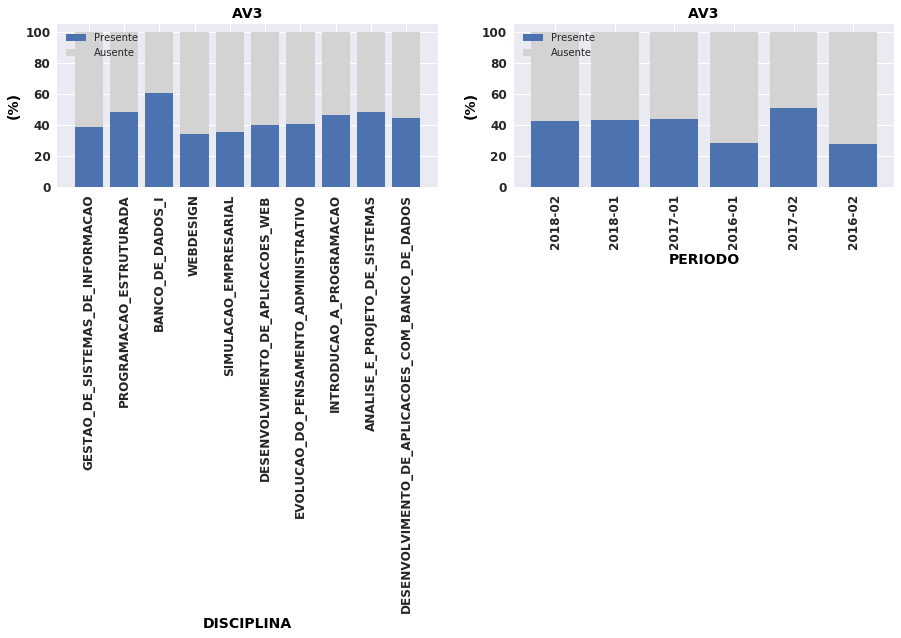

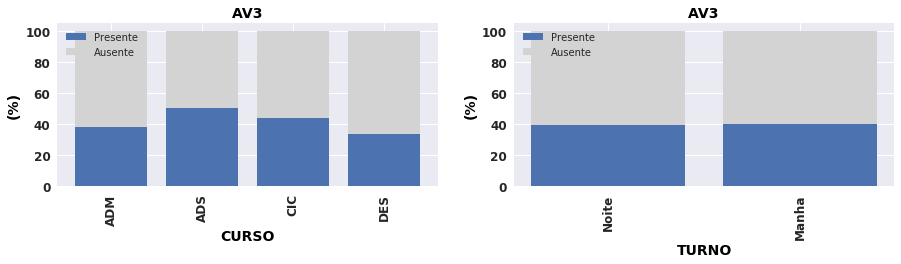

In [19]:
# plotAV3Por(df, ['CURSO', 'PERIODO', 'TURMA', 'TURNO', 'DISCIPLINA', 'MATRICULA'])
# ---------------------------------
# plotAV3Por(df, ['TURMA', 'DISCIPLINA', 'PERIODO', 'CURSO', 'TURNO',], absolute=False)
# plotAV3Por(df, ['TURMA', 'DISCIPLINA', 'PERIODO', 'CURSO',], absolute=False)
# plotAV3Por(df, ['TURMA', 'DISCIPLINA', 'PERIODO',], absolute=False)
# plotAV3Por(df, ['TURMA', 'DISCIPLINA',], absolute=False)
plotAV3Por(df, ['DISCIPLINA', 'PERIODO',], absolute=False)
plotAV3Por(df, ['CURSO', 'TURNO',], absolute=False)

In [20]:
# quantos alunos fizeram a avaliação final e quantos não fizeram por turmas e em proporção percentual.

## Turma com Maior presença
# Considerando a maior presença em uma turma, 
# teria uma economia de mais de 30% somente com observações

for i in range(len(cav3[0])):
    if cav3[0][i] == max(cav3[0]):
        print( 'Turma   :', pp[0][i] )
        print( 'Presença: %.2f' % max(cav3[0]), '%' )
        print( 'Ausência: %.2f' % (100 - max(cav3[0])), '%' )

Turma   : 161-2017-02
Presença: 62.96 %
Ausência: 37.04 %


In [21]:
for i in range(len(abs_cav3[0])):
    if abs_cav3[0][i] == max(abs_cav3[0]):
        print( 'Turma', abs_pp[0][i] + ' :' ,len(df[df.Turma == (abs_pp[0][i])]) )
        print( 'Presença \t  : %.2i' % (abs_cav3[0][i]) )
        print( 'Ausência \t  : %.2i' % (len(df[df.Turma == (abs_pp[0][i])]) - abs_cav3[0][i]) )

Turma 232-2017-02 : 81
Presença 	  : 48
Ausência 	  : 33


In [22]:
len(df[df.Turma == '232-2017-02']), \
len(df[(df.Turma == '232-2017-02') & (df.AV3 > 0)]), \
len(df[(df.Turma == '232-2017-02') & (df.AV3 == 0)])

(81, 48, 33)

[Text(0, 0, '-10'),
 Text(0, 0, '0'),
 Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '70')]

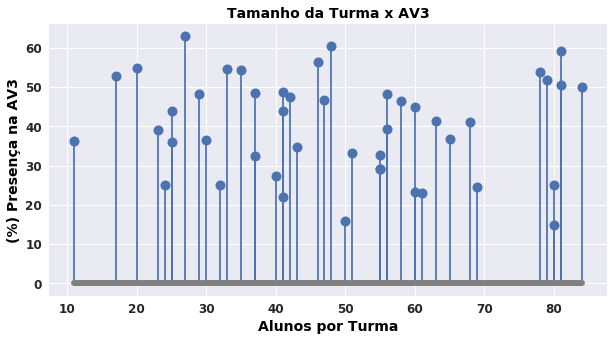

In [23]:
## https://python-graph-gallery.com/181-custom-lollipop-plot/
# ---------------------------------
# print(plt.style.available)
plt.style.use('seaborn')
# plt.style.use('default')

x = dd.TOTAL
y = dd.AV3
# ---------------------------------
# plt.figure(figsize=(10,5))
nrowsSegments = 1
ncolsSegments = 1
(fig, axes) = plt.subplots(nrowsSegments, ncolsSegments, figsize=(10, 5))
# ---------------------------------
(markers, stemlines, baseline) = plt.stem(x, y, markerfmt='C0o') # , linefmt='grey'
# (markers, stemlines, baseline) = plt.stem(x, y, '-')
# ---------------------------------
plt.setp(baseline, linestyle="-", color="grey", linewidth=6)
# ---------------------------------
plt.setp(markers, marker='o', markersize=8, markeredgewidth=2, alpha=1) # , color='blue' markeredgecolor='blue',
# plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2.5)
# ---------------------------------
# plt.plot(x, y, linestyle='-', color='orange', linewidth=3) # , marker='o'
# ---------------------------------
fontTitle = {'fontweight':'bold', 'fontsize':14, 'color':'black'}
fontLabels = {'fontweight':'bold', 'fontsize':14, 'color':'black'}
plt.xlabel('Alunos por Turma', fontLabels)
plt.ylabel('(%) Presença na AV3', fontLabels)
plt.title('Tamanho da Turma x AV3', fontTitle)
# ---------------------------------
ticklabels_fontsize = 12
ticklabels_fontweight = 'bold'
axes.get_xticks()
axes.get_yticks()
axes.set_xticklabels(array([ int(ii) for ii in axes.get_xticks() ]), 
                     fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
axes.set_yticklabels(array([ int(ii) for ii in axes.get_yticks() ]), 
                     fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)

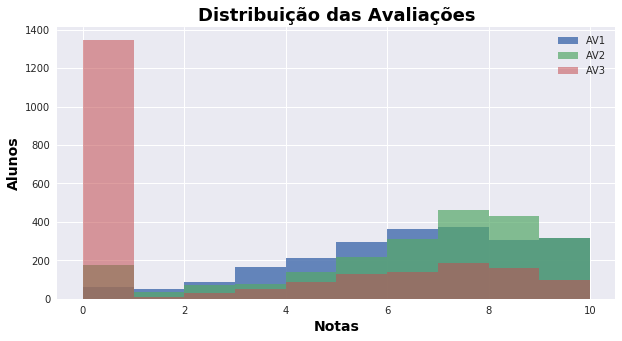

In [24]:
def histAvs(data, avs=['AV1','AV2','AV3']):
    alpha = 1.0
    for av in avs:
        alpha -= 0.15
        data[av].hist(bins=10, alpha=alpha)
    fontTitle = {'fontweight':'bold', 'fontsize':18, 'color':'black'}
    fontLabels = {'fontweight':'bold', 'fontsize':14, 'color':'black'}
    plt.xlabel('Notas', fontLabels)
    plt.ylabel('Alunos', fontLabels)
    plt.title('Distribuição das Avaliações', fontTitle)
#     plt.ylim(0,len(data))
    plt.legend((avs))
        
plt.figure(figsize=(10,5))

# histAvs(df, avs=['AV1'])
# histAvs(df, avs=['AV1','AV2'])
histAvs(df, avs=['AV1','AV2','AV3'])

In [25]:
# df[['AV1','AV2','AV3']].hist(bins=10, figsize=(10,7))

In [26]:
# # https://matplotlib.org/examples/color/colormaps_reference.html
# import matplotlib.pyplot as plt
# from matplotlib import cm
# def plot_corr(df, size=8):
#     corr = df.corr(method='pearson')
#     fig, ax = plt.subplots(figsize = (size, size))
#     img = ax.matshow(corr, vmin=-1, vmax=1, cmap = cm.coolwarm, alpha=0.8) #, cmap='hot', cmap='bone', cmap='Blues', cmap='RdBu'
#     plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90)
#     plt.yticks(range(len(corr.columns)), corr.columns)
#     plt.tick_params( bottom=False, top=False, left=False, right=False )
#     plt.colorbar(img, shrink = 0.62)
#     plt.show()

In [27]:
# plot_corr(df[['AV1','AV2','AV3']])

### Quem já havia passado, e veio melhorar nota ?

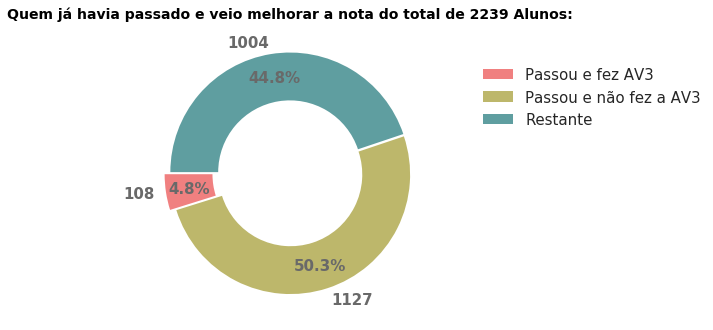

In [28]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

total = df.shape[0]
passou_na_AV2 = df[df.MEDIAParcial >= 7].shape[0]
passou_e_fez_AV3 = df[(df.MEDIAParcial >= 7) & (df.AV3 > 0) ].shape[0]

# print('Total             : %s' % total)
# print('Passou na AV2     : {} ({}%)'.format( passou_na_AV2, round(passou_na_AV2 / total*100, 2 )))
# print('Passou e fez a AV3:  {} ({}%)'.format( passou_e_fez_AV3, round(passou_e_fez_AV3 / total*100, 2) ))

slices = [ passou_e_fez_AV3, passou_na_AV2, (total-(passou_na_AV2+passou_e_fez_AV3)) ]
labels = ['Passou e fez AV3','Passou e não fez a AV3','Restante']
labels2 = ['{}'.format(passou_e_fez_AV3),
           '{}'.format(passou_na_AV2),
           '{}'.format(total-(passou_na_AV2+passou_e_fez_AV3))]
colors = ['lightcoral','darkkhaki','cadetblue']
# colors = ['pink','lightsalmon','rosybrown','tan','darkkhaki','lightgreen','cyan','cadetblue','lightblue']

plt.pie(slices, labels=labels2, colors=colors, explode=(0.05,0.01,0.01),
        wedgeprops={'width':0.4},
        autopct='%.1f%%', 
        pctdistance=0.8,
        textprops={'color':'dimgrey','size':15, 'weight':'bold'},
        startangle=180, shadow=False,)

plt.title('Quem já havia passado e veio melhorar a nota do total de %s Alunos:' % total, fontTitle)
plt.legend( labels=labels, bbox_to_anchor=(1.1, 0.9), fontsize=15 )

### Quantidade de faltas em média dos alunos que só fazem a AV1?

In [29]:
df.FALTAS[(df.AV1 > 0) & (df.AV2 == 0) & (df.AV3 == 0)].describe()

count    138.000000
mean       5.543478
std        2.628090
min        0.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: FALTAS, dtype: float64

[Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '25'),
 Text(0, 0, '30'),
 Text(0, 0, '35'),
 Text(0, 0, '40'),
 Text(0, 0, '45')]

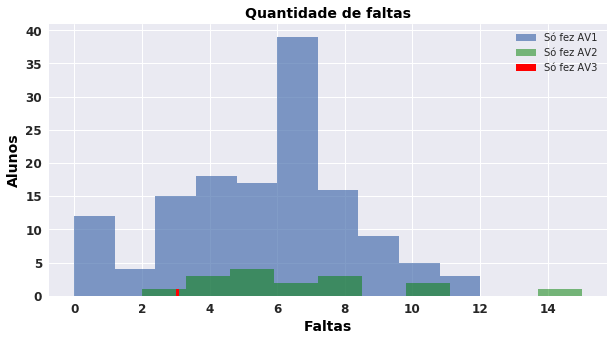

In [30]:
# print(plt.style.available)
plt.style.use('seaborn')
# plt.style.use('default')

bins=10
soAV1 = df.FALTAS[(df.AV1 > 0) & (df.AV2 == 0) & (df.AV3 == 0)]
soAV2 = df.FALTAS[(df.AV1 == 0) & (df.AV2 > 0) & (df.AV3 == 0)]
soAV3 = df.FALTAS[(df.AV1 == 0) & (df.AV2 == 0) & (df.AV3 > 0)]

fontTitle = {'fontweight':'bold', 'fontsize':14, 'color':'black'}
fontLabels = {'fontweight':'bold', 'fontsize':14, 'color':'black'}

# plt.figure(figsize=(10,5))
nrowsSegments = 1
ncolsSegments = 1
(fig, axes) = plt.subplots(nrowsSegments, ncolsSegments, figsize=(10, 5))

plt.hist( soAV1, bins=bins, alpha=0.7 )
plt.hist( soAV2, bins=bins, alpha=0.5, color='green' )
plt.hist( soAV3, bins=bins, alpha=1, color='red' ) # , edgecolor='red', linewidth=1

plt.title('Quantidade de faltas', fontTitle)
plt.xlabel('Faltas', fontLabels)
plt.ylabel('Alunos', fontLabels)

plt.legend(('Só fez AV1','Só fez AV2','Só fez AV3'))

ticklabels_fontsize = 12
ticklabels_fontweight = 'bold'
axes.set_xticklabels(array([ int(ii) for ii in axes.get_xticks() ]), fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
axes.set_yticklabels(array([ int(ii) for ii in axes.get_yticks() ]), fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)

### Quantidade de faltas dos alunos que não fazem a AV3
As observações mostram que as faltas dos alunos que não fazem a AV3 seguem o mesmo padrão das faltas em geral

[Text(0, 0, '0'),
 Text(0, 0, '100'),
 Text(0, 0, '200'),
 Text(0, 0, '300'),
 Text(0, 0, '400'),
 Text(0, 0, '500'),
 Text(0, 0, '600')]

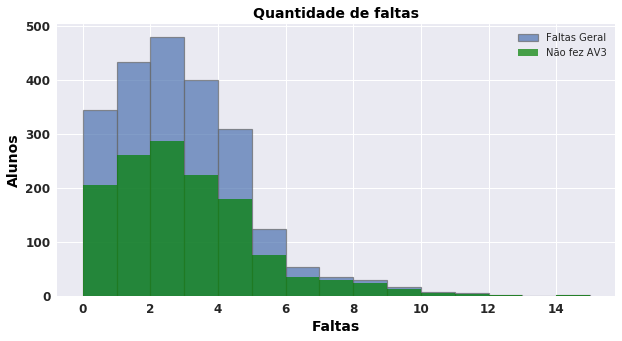

In [31]:
bins=15
faltasGeral = df.FALTAS
faltas_quem_nao_faz_AV3 = df.FALTAS[df.AV3 == 0]

fontTitle = {'fontweight':'bold', 'fontsize':14, 'color':'black'}
fontLabels = {'fontweight':'bold', 'fontsize':14, 'color':'black'}

# plt.figure(figsize=(10,5))
nrowsSegments = 1
ncolsSegments = 1
(fig, axes) = plt.subplots(nrowsSegments, ncolsSegments, figsize=(10, 5))

plt.hist( faltasGeral, bins=bins, alpha=0.7, edgecolor='dimgrey', linewidth=1.2,)
plt.hist( faltas_quem_nao_faz_AV3, bins=bins, alpha=0.7, color='green' )

plt.title('Quantidade de faltas', fontTitle)
plt.xlabel('Faltas', fontLabels)
plt.ylabel('Alunos', fontLabels)

plt.legend(('Faltas Geral','Não fez AV3'))

ticklabels_fontsize = 12
ticklabels_fontweight = 'bold'
axes.set_xticklabels(array([ int(ii) for ii in axes.get_xticks() ]), fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
axes.set_yticklabels(array([ int(ii) for ii in axes.get_yticks() ]), fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)

### Quantidade de alunos que precisam de mais de 10 pontos que vem fazer a AV3

[Text(0, 0, '0'),
 Text(0, 0, '50'),
 Text(0, 0, '100'),
 Text(0, 0, '150'),
 Text(0, 0, '200'),
 Text(0, 0, '250'),
 Text(0, 0, '300'),
 Text(0, 0, '350')]

<Figure size 720x360 with 0 Axes>

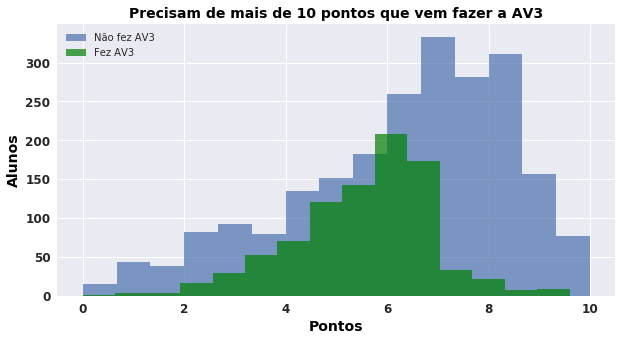

In [32]:
bins=15
sem_chances = df.MEDIAParcial[(df.MEDIAParcial < 11)]
av3_sem_chances = df.MEDIAParcial[(df.MEDIAParcial < 11) & (df.AV3 > 0)]

fontTitle = {'fontweight':'bold', 'fontsize':14, 'color':'black'}
fontLabels = {'fontweight':'bold', 'fontsize':14, 'color':'black'}

plt.figure(figsize=(10,5))
nrowsSegments = 1
ncolsSegments = 1
(fig, axes) = plt.subplots(nrowsSegments, ncolsSegments, figsize=(10, 5))

plt.hist( sem_chances, bins=bins, alpha=0.7, edgecolor='dimgrey', linewidth=0,)
plt.hist( av3_sem_chances, bins=bins, alpha=0.7, color='green', edgecolor='dimgrey', linewidth=0,)

plt.title('Precisam de mais de 10 pontos que vem fazer a AV3', fontTitle)
plt.xlabel('Pontos', fontLabels)
plt.ylabel('Alunos', fontLabels)
plt.legend(('Não fez AV3','Fez AV3'))

ticklabels_fontsize = 12
ticklabels_fontweight = 'bold'
axes.set_xticklabels(array([ int(ii) for ii in axes.get_xticks() ]), fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)
axes.set_yticklabels(array([ int(ii) for ii in axes.get_yticks() ]), fontsize=ticklabels_fontsize, fontweight=ticklabels_fontweight)

In [33]:
# import imblearn
# from imblearn.over_sampling import SMOTE, ADASYN
# data_o, target_o = SMOTE().fit_sample(df[['AV1','AV2']], df.AV3Bin)

# import collections
# collections.Counter(target_o)

In [34]:
# https://matplotlib.org/examples/color/colormaps_reference.html
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
# ---------------------------------
# print(plt.style.available)
plt.style.use('default')
# ---------------------------------
def plot_corr(df, size=8, 
              fontweightX='normal', colorX='black', fontsizeX=10, rotationX=90, 
              fontweightY='normal', colorY='black', fontsizeY=10, rotationY=0):
    
    corr = df.corr(method='pearson')
    fig, ax = plt.subplots(figsize = (size, size))
    img = ax.matshow(corr, vmin=-1, vmax=1, cmap = cm.coolwarm, alpha=0.8) #, cmap='hot', cmap='bone', cmap='Blues', cmap='RdBu'
    
    xticklabelsX=dict(fontweight=fontweightX, color=colorX, fontsize=fontsizeX, rotation=rotationX)
    xticklabelsY=dict(fontweight=fontweightY, color=colorY, fontsize=fontsizeY, rotation=rotationY)
    
    ax.set_xticklabels([''] + list(corr.columns), xticklabelsX)
    ax.set_yticklabels([''] + list(corr.columns), xticklabelsY)
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    plt.tick_params( bottom=False, top=False, left=False, right=False )
    plt.colorbar(img, shrink = 0.82)
    plt.show()

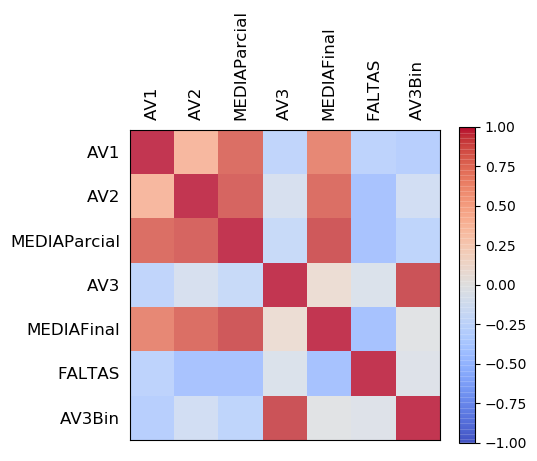

In [35]:
plot_corr(df, size=5, 
          fontweightX='normal', colorX='black', fontsizeX=12, rotationX=90, 
          fontweightY='normal', colorY='black', fontsizeY=12, rotationY=0)